# Lecture 3: Statistical Graphs
### Zhentao Shi

kernel: base (python 3.11.3)


## Graphics

An English cliche says "One picture is worth ten thousand words".
John Tukey, a renowned mathematical statistician, was one of the pioneers of statistical graphs
in the computer era. Nowadays, powerful software is able to produce dazzling statistical graphs,
sometimes web-based and interactive. Outside of academia, journalism hooks a wide readership with
professional data-based graphs. New York Times and The Economists are first-rate examples;
South China Morning Post sometimes also does a respectable job.
A well designed statistical graph can deliver an intuitive and powerful message.
I consider graph prior to table when writing a research report or an academic paper.
Graph is lively and engaging. Table is tedious and boring.

We have seen an example of mathplotlib graph in the OLS regression linear example in Lecture 1.
`plot` is a generic command for graphs, and is one of the oldest libraries in Python for plotting.
It is capable of producing preliminary statistical graphs.

Over the years, developers all over the world have had many proposals for
more sophisticated statistical graphs. In my opinion, `ggplot2`, contributed by [Hadley Wickham](http://had.co.nz/),
is the best.

`ggplot2` is an advanced graphic system that generates high-quality statistical graphs.
It is not possible to cover it in a lecture. Fortunately, the author wrote a comprehensive reference.

The workflow of ggplot is to add the elements in a graph one by one, and then print out
the graph all together.
In contrast, `plot` draws the main graph at first, and then adds the supplementary elements later.

`ggplot2` is particularly good at drawing multiple graphs, either of the same pattern or of
different patterns. Multiple subgraphs convey rich information and easy comparison.

In Python, many libraries have established a solid reputation for plotting, for example: `matplotlib`, `seaborn`, `Altair` or even `ggplot` and `pandas`. But many people prefer the syntax and the "grammar of graphics" as in `ggplot2`, hence the trend goes to the package `plotnine` which is capable of data visualization like ggplot2 in R.

In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
import datetime

c:\Users\zhent\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


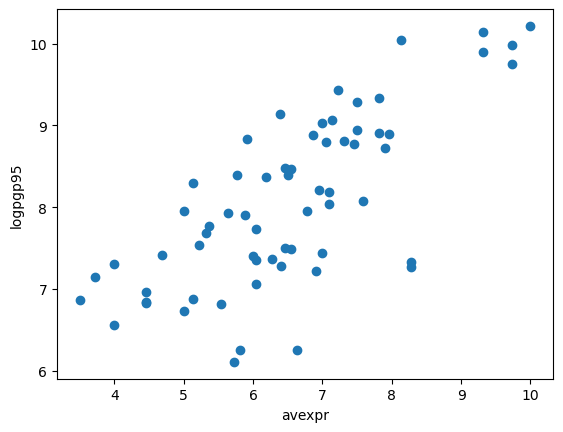

In [2]:
# Read the CSV file
d0 = pd.read_csv("data_example/AJR.csv")

# Plot the data
plt.scatter(d0['avexpr'], d0['logpgp95'])
plt.xlabel('avexpr')
plt.ylabel('logpgp95')
plt.show()

In [3]:

# Read the CSV file
bank_0 = pd.read_csv("data_example/bank-full.csv", sep=";")

# Display the dataframe
print(bank_0)

# Print the names of the columns
print(bank_0.columns)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd

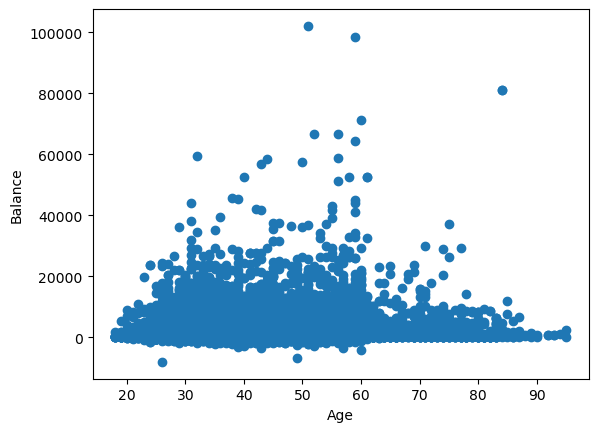

In [4]:
# Scatter plot
plt.scatter(bank_0['age'], bank_0['balance'])
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

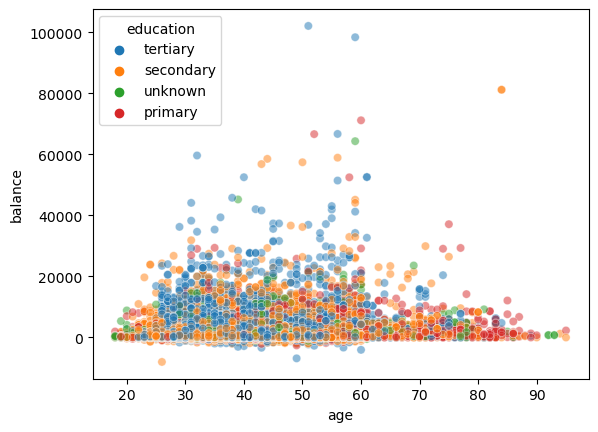

In [5]:
# Scatter plot with groups
import seaborn as sns
sns.scatterplot(data=bank_0, x='age', y='balance', hue='education', alpha=0.5)
plt.show()

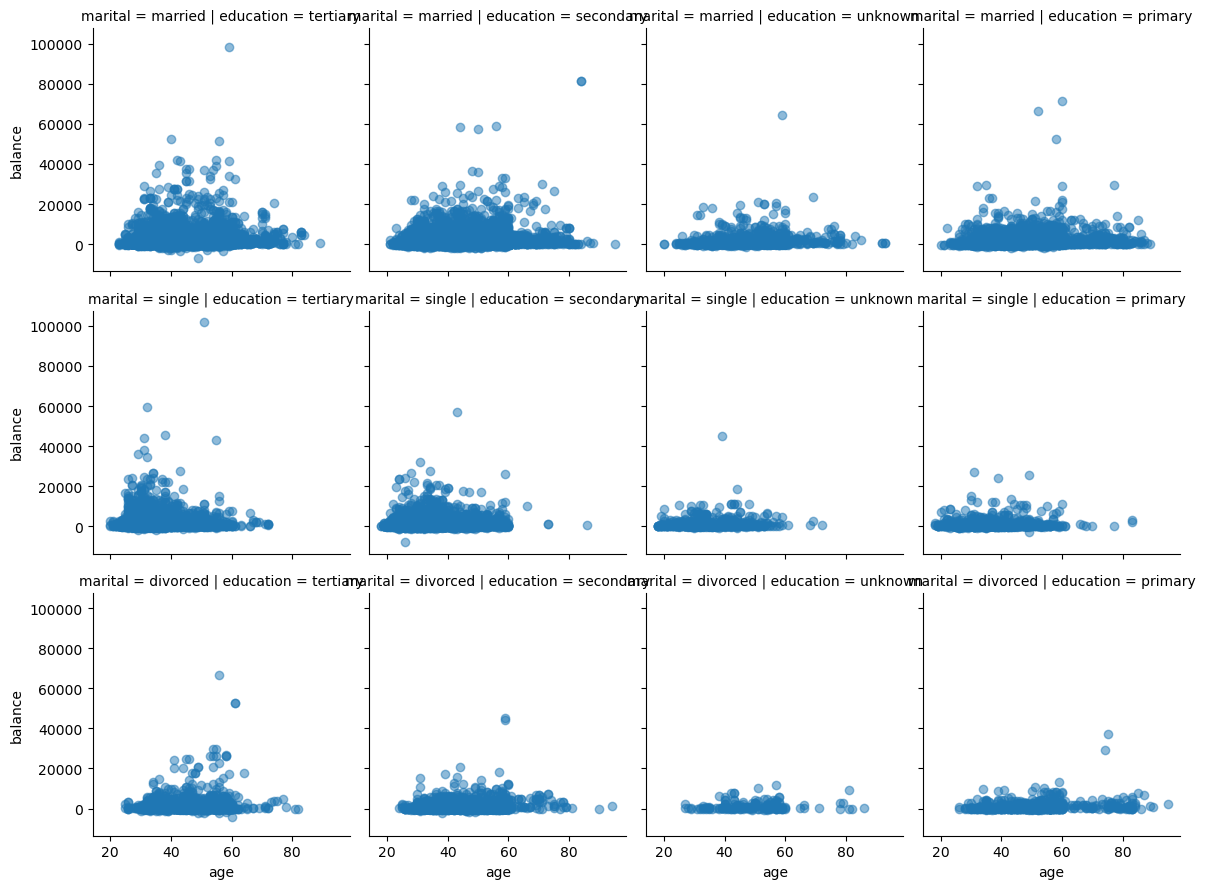

In [6]:
# Create a FacetGrid
g = sns.FacetGrid(bank_0, col='education', row='marital')

# Map a scatter plot to the FacetGrid
g.map(plt.scatter, 'age', 'balance', alpha=0.5)

# Show the plot
plt.show()

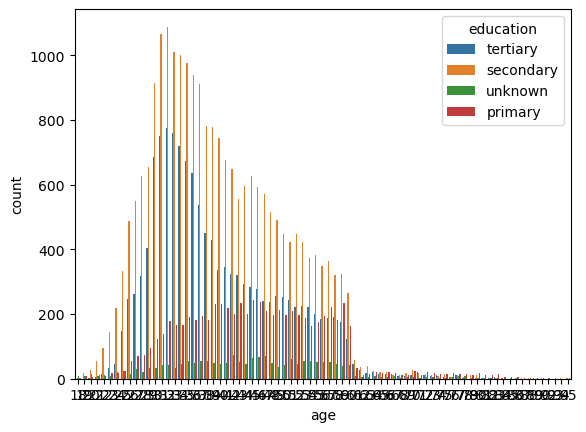

In [7]:
# Bar plot with 'education' as hue
sns.countplot(data=bank_0, x='age', hue='education')
plt.show()

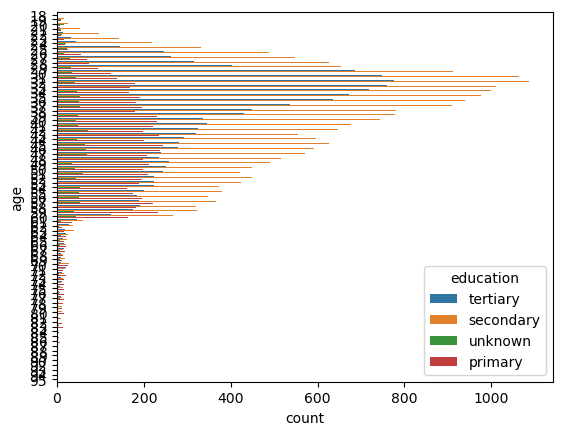

In [8]:
# Dodged bar plot with 'education' as hue
sns.countplot(data=bank_0, y='age', hue='education', dodge=True)
plt.show()

### data manipulation

In [9]:
# Read the CSV file
d0 = pd.read_csv("data_example/PWT100.csv")

# Display the first few rows of the dataframe
print(d0.head())

# Print the names of the columns
print(d0.columns)

  countrycode country   currency_unit  year  rgdpe  rgdpo  pop  emp  avh  hc  \
0         ABW   Aruba  Aruban Guilder  1950    NaN    NaN  NaN  NaN  NaN NaN   
1         ABW   Aruba  Aruban Guilder  1951    NaN    NaN  NaN  NaN  NaN NaN   
2         ABW   Aruba  Aruban Guilder  1952    NaN    NaN  NaN  NaN  NaN NaN   
3         ABW   Aruba  Aruban Guilder  1953    NaN    NaN  NaN  NaN  NaN NaN   
4         ABW   Aruba  Aruban Guilder  1954    NaN    NaN  NaN  NaN  NaN NaN   

   ...  csh_x  csh_m  csh_r  pl_c  pl_i  pl_g  pl_x  pl_m  pl_n  pl_k  
0  ...    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1  ...    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2  ...    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3  ...    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4  ...    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 52 columns]
Index(['countrycode', 'country', 'currency_unit', 'year', 'rgdpe

In [10]:
# Select specific columns and filter rows
d1 = d0[['countrycode', 'year', 'rgdpe', 'pop']]
d1 = d1[d1['countrycode'].isin(['CHN', 'RUS', 'JPN', 'USA'])]

# Create new column 'gdpcapita'
d1['gdpcapita'] = d1['rgdpe'] / d1['pop']

# Print the dataframe
print(d1)

      countrycode  year        rgdpe         pop     gdpcapita
2310          CHN  1950          NaN         NaN           NaN
2311          CHN  1951          NaN         NaN           NaN
2312          CHN  1952    554906.44  579.577178    957.433214
2313          CHN  1953    626291.13  589.316981   1062.740682
2314          CHN  1954    584967.13  599.942909    975.037993
...           ...   ...          ...         ...           ...
12175         USA  2015  18905122.00  320.878310  58916.796215
12176         USA  2016  19285252.00  323.015995  59703.706004
12177         USA  2017  19754754.00  325.084756  60768.010912
12178         USA  2018  20369440.00  327.096265  62273.532839
12179         USA  2019  20860506.00  329.064917  63393.284797

[280 rows x 5 columns]


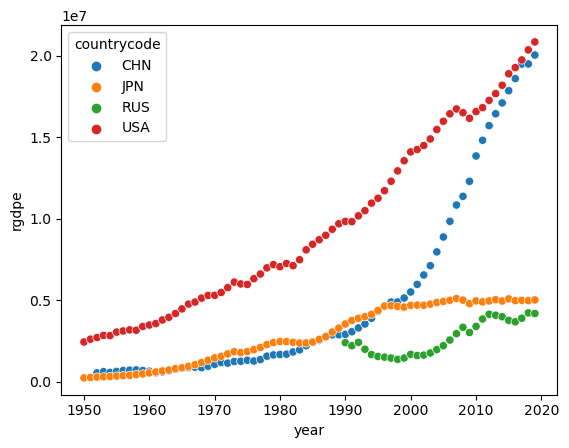

In [11]:
# Scatter plot with 'countrycode' as hue
sns.scatterplot(data=d1, x='year', y='rgdpe', hue='countrycode')
plt.show()

c:\Users\zhent\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\zhent\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\zhent\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\zhent\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

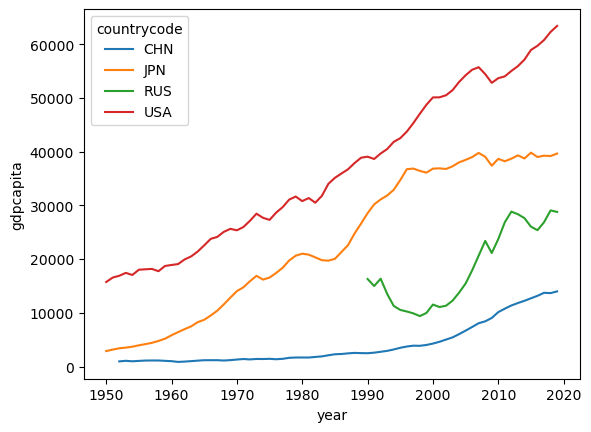

In [12]:
# Line plot with 'countrycode' as hue
sns.lineplot(data=d1, x='year', y='gdpcapita', hue='countrycode')
plt.show()

In [13]:
# Select specific columns
s1 = d1[['countrycode', 'year', 'pop']]

# Spread 'year' column into multiple columns with 'pop' as values
s1 = s1.pivot(index='countrycode', columns='year', values='pop')

print(s1)

year               1950        1951        1952        1953        1954  \
countrycode                                                               
CHN                 NaN         NaN  579.577178  589.316981  599.942909   
JPN           84.274267   85.640724   86.943150   88.145992   89.250869   
RUS                 NaN         NaN         NaN         NaN         NaN   
USA          155.583973  158.247704  160.980892  163.669147  166.572976   

year               1955        1956        1957        1958        1959  ...  \
countrycode                                                              ...   
CHN          612.053060  624.568161  638.770299  652.377171  660.090622  ...   
JPN           90.317983   91.274458   92.075719   92.906103   93.818977  ...   
RUS                 NaN         NaN         NaN         NaN         NaN  ...   
USA          169.541179  172.577841  175.725868  178.686931  181.699069  ...   

year                2010         2011         2012         2013     

In [14]:
# Gather '1950' to '2019' columns into key-value pairs
s1 = s1.reset_index().melt(id_vars='countrycode', var_name='year', value_name='pop')

# Print the dataframe
print(s1)

    countrycode  year          pop
0           CHN  1950          NaN
1           JPN  1950    84.274267
2           RUS  1950          NaN
3           USA  1950   155.583973
4           CHN  1951          NaN
..          ...   ...          ...
275         USA  2018   327.096265
276         CHN  2019  1433.783686
277         JPN  2019   126.860301
278         RUS  2019   145.872256
279         USA  2019   329.064917

[280 rows x 3 columns]


## Interactive Graphs

* [Plotly](https://plotly.com/graphing-libraries/)

* Shinny for Python [posit](https://shiny.posit.co/py/docs/overview.html)
* [Shinny Express](https://shiny.posit.co/blog/posts/shiny-express/)
